In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#Load the Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/MLAL/Wholesale customers data.csv')

Display the first few rows

In [3]:
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


#Preprocessing the Data

In [4]:
# Exclude categorical columns ('Channel' and 'Region') for clustering
quantitative_features = data.drop(columns=['Channel', 'Region'])

In [5]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(quantitative_features)

#K-Means Clustering with Elbow Method

Based on these results,
𝑘
=
4
k=4 seems like a balanced choice for K-means. Next, I’ll build a K-means model with 4 clusters and analyze the results.

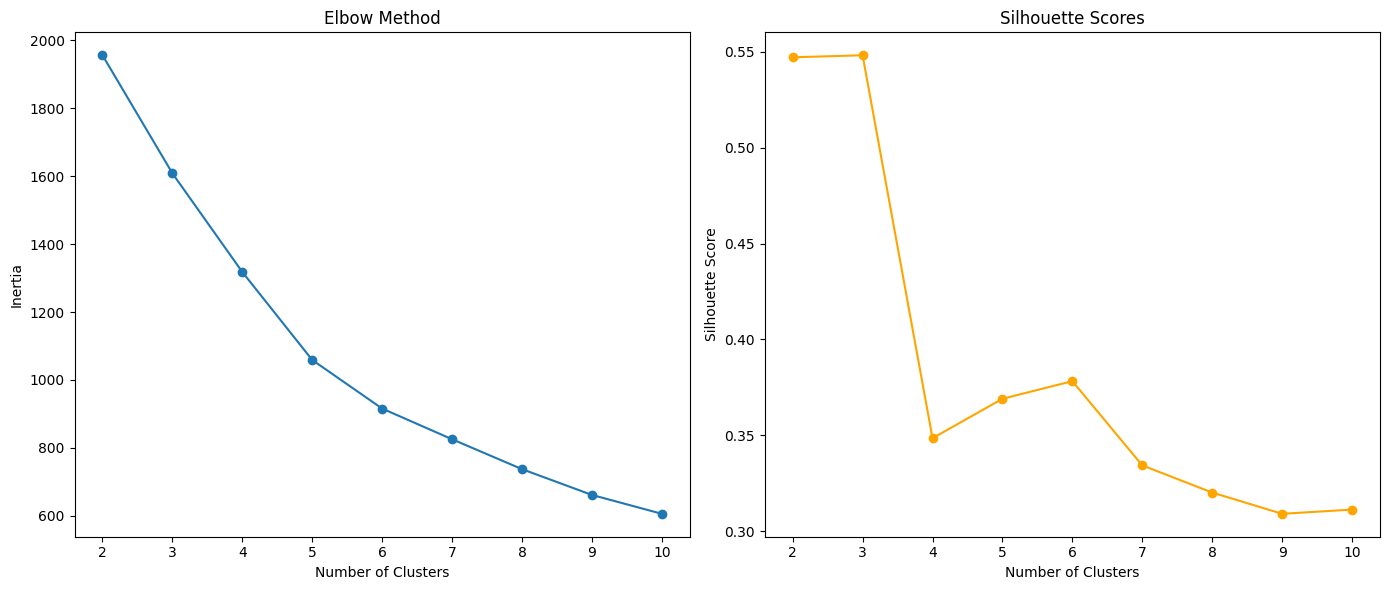

KMeans_Cluster
1    315
0    110
2     10
3      5
Name: count, dtype: int64


In [6]:
# Elbow method and silhouette scores
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

# Plot Elbow and Silhouette Scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].plot(cluster_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(cluster_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose k=4 (based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(normalized_data)
data['KMeans_Cluster'] = kmeans_labels

# Display cluster counts
print(data['KMeans_Cluster'].value_counts())


#Perform DBSCAN Clustering

In [7]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_data)
data['DBSCAN_Cluster'] = dbscan_labels

Display cluster counts

In [8]:
print(data['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    413
-1     27
Name: count, dtype: int64


#PCA for Dimensionality Reduction

Perform PCA

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

Add PCA results to the dataset

In [10]:
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

Scatter plot of clusters after PCA

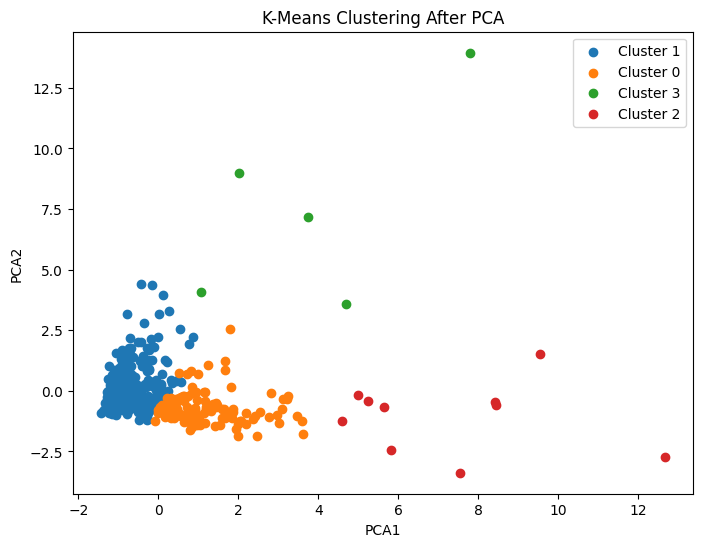

In [11]:
plt.figure(figsize=(8, 6))
for cluster in data['KMeans_Cluster'].unique():
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('K-Means Clustering After PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()